In [8]:
#Dependencies
import matplotlib.pyplot as plt 
from matplotlib.pylab import rcParams
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
sns.set(style='ticks',font='Arial',font_scale=1.2)
rcParams['figure.figsize'] = 12,8
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
 
# load dataset
df = pd.read_csv("data/cfb_attendance.csv", encoding="cp1252")
 
# view dataset
df.head()

,Date,Team,Time,Opponent,Rank,Site,TV,Result,Attendance,Current Wins,...,PRCP,SNOW,SNWD,TMAX,TMIN,Opponent_Rank,Conference,Year,Month,Day
0,4/9/2011,Middle Tennessee,1:00 PM,Blue-White Spring Game,NR,"Johnny ""Red"" Floyd StadiumMurfreesboro, TN",Not on TV,Blue 67-60,3409,0,...,0.00,0.0,0.0,84,59,NR,Sun Belt,2011,4,9
1,11/20/2010,Iowa State,6:00 PM,No. 15 Missouri,NR,"Jack Trice StadiumAmes, IA (Battle for the Tel...",FSN,L 0-14,41776,5,...,0.00,0.0,0.0,38,24,15,Big-12,2010,11,20
2,9/18/2015,Boston College,8:00 PM,No. 9 Florida State,NR,"Alumni StadiumChestnut Hill, MA",ESPN,L 0-14,39111,2,...,0.00,0.0,0.0,87,64,9,ACC,2015,9,18
3,9/21/2013,Miami (OH),4:00 PM,Cincinnati*,NR,"Yager StadiumOxford, OH (118th Battle for the ...",ESPN3,L 0-14,21586,0,...,0.38,0.0,0.0,75,51,NR,Mid-American,2013,9,21
4,11/29/2008,UCF,1:00 PM,UAB,NR,"Bright House Networks StadiumOrlando, FL",Not on TV,L 0-15,23644,4,...,0.00,0.0,0.0,79,48,NR,CUSA,2008,11,29


In [9]:
df = df[df["Result"].str.contains("Blue") == False]
df = df[df["Result"].str.contains("White") == False]
df = df[df["Result"].str.contains("OT") == False]
df = df[df["Result"].str.contains("A") == False]
df = df[df["Result"].str.contains("\[") == False]
df = df[df["Result"].str.contains("\]") == False]
df = df[df["Result"].str.contains("\(") == False]
df = df[df["Result"].str.contains("\)") == False]
df = df[df["Result"].str.contains("‡") == False]

In [10]:
df['W/L'] = df['Result'].str.split(' ', expand=True)[0]
df['Score'] = df['Result'].str.split(' ', expand=True)[1]
df['Home Score'] = df['Score'].str.split('-', expand=True)[0]
df['Away Score'] = df['Score'].str.split('-', expand=True)[1]


In [11]:
df = df.astype({'Home Score': 'int64'})
df = df.astype({'Away Score': 'int64'})
df.dtypes

Date                 object
Team                 object
Time                 object
Opponent             object
Rank                 object
Site                 object
TV                   object
Result               object
Attendance            int64
Current Wins          int64
Current Losses        int64
Stadium Capacity      int64
Fill Rate           float64
New Coach              bool
Tailgating             bool
PRCP                float64
SNOW                float64
SNWD                float64
TMAX                  int64
TMIN                  int64
Opponent_Rank        object
Conference           object
Year                  int64
Month                 int64
Day                   int64
W/L                  object
Score                object
Home Score            int64
Away Score            int64
dtype: object

In [12]:
win_margin = df["Home Score"] - df["Away Score"]
df['Win Margin'] = win_margin
df

,Date,Team,Time,Opponent,Rank,Site,TV,Result,Attendance,Current Wins,...,Opponent_Rank,Conference,Year,Month,Day,W/L,Score,Home Score,Away Score,Win Margin
1,11/20/2010,Iowa State,6:00 PM,No. 15 Missouri,NR,"Jack Trice StadiumAmes, IA (Battle for the Tel...",FSN,L 0-14,41776,5,...,15,Big-12,2010,11,20,L,0-14,0,14,-14
2,9/18/2015,Boston College,8:00 PM,No. 9 Florida State,NR,"Alumni StadiumChestnut Hill, MA",ESPN,L 0-14,39111,2,...,9,ACC,2015,9,18,L,0-14,0,14,-14
3,9/21/2013,Miami (OH),4:00 PM,Cincinnati*,NR,"Yager StadiumOxford, OH (118th Battle for the ...",ESPN3,L 0-14,21586,0,...,NR,Mid-American,2013,9,21,L,0-14,0,14,-14
4,11/29/2008,UCF,1:00 PM,UAB,NR,"Bright House Networks StadiumOrlando, FL",Not on TV,L 0-15,23644,4,...,NR,CUSA,2008,11,29,L,0-15,0,15,-15
5,11/25/2008,Northern Illinois,6:00 PM,Navy*,NR,"Huskie StadiumDeKalb, IL",ESPNC,L 0-16,17950,6,...,NR,Mid-American,2008,11,25,L,0-16,0,16,-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6662,11/22/2016,Ohio,7:00 PM,Akron,NR,"Peden StadiumAthens, OH",ESPNU,W 9-3,18025,7,...,NR,Mid-American,2016,11,22,W,9-3,9,3,6
6663,9/8/2012,South Alabama,4:00 PM,Nicholls State*,NR,"Ladd-Peebles StadiumMobile, AL",ESPN3,W 9-3,15237,0,...,NR,FCS,2012,9,8,W,9-3,9,3,6
6666,11/17/2018,Nebraska,11:00 AM,Michigan State,NR,"Memorial StadiumLincoln, NE",FOX,W 9-6,88793,3,...,NR,Big-10,2018,11,17,W,9-6,9,6,3
6667,11/20/2010,Texas A&M,7:00 PM,No. 9 Nebraska,18,"Kyle FieldCollege Station, TX",ABC,W 9-6,90079,7,...,9,Big-12,2010,11,20,W,9-6,9,6,3


In [13]:
s = df
s.describe()

,Attendance,Current Wins,Current Losses,Stadium Capacity,Fill Rate,PRCP,SNOW,SNWD,TMAX,TMIN,Year,Month,Day,Home Score,Away Score,Win Margin
count,6308.000000,6308.000000,6308.000000,6308.000000,6308.000000,6308.000000,6308.000000,6308.000000,6308.000000,6308.000000,6308.000000,6308.000000,6308.000000,6308.000000,6308.000000,6308.000000
mean,45049.033291,2.870482,2.357958,54390.392517,0.792320,0.093515,0.010130,0.016725,71.827679,50.071972,2009.235415,9.909797,15.423431,31.284242,22.665821,8.618421
std,25013.998669,2.430293,2.246140,21651.362686,0.221488,0.338403,0.197969,0.262963,14.521007,14.203014,5.392497,0.920468,8.993524,15.010991,13.785012,22.766365
min,2267.000000,0.000000,0.000000,17000.000000,0.067483,0.000000,0.000000,0.000000,19.000000,0.000000,2000.000000,1.000000,1.000000,0.000000,0.000000,-78.000000
25%,23222.500000,1.000000,0.000000,36000.000000,0.642934,0.000000,0.000000,0.000000,62.000000,39.000000,2005.000000,9.000000,8.000000,20.000000,13.000000,-7.000000
50%,42359.000000,2.000000,2.000000,52180.000000,0.844707,0.000000,0.000000,0.000000,73.000000,51.000000,2009.000000,10.000000,15.000000,31.000000,21.000000,8.000000
75%,61780.750000,4.000000,4.000000,71228.000000,0.989017,0.010000,0.000000,0.000000,83.000000,61.000000,2014.000000,11.000000,23.000000,41.000000,31.000000,24.000000
max,110889.000000,12.000000,11.000000,107282.000000,1.403993,6.450000,8.200000,7.100000,111.000000,103.000000,2018.000000,12.000000,31.000000,83.000000,78.000000,79.000000


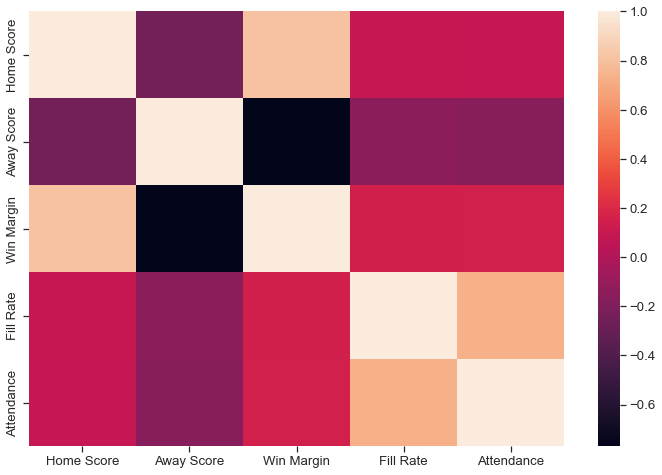

In [14]:
plot = sns.heatmap((df[['Home Score', 'Away Score', 'Win Margin', 'Fill Rate', 'Attendance']].corr()))

In [15]:
print(df[['Home Score', 'Away Score', 'Win Margin', 'Attendance']].corr() )

            Home Score  Away Score  Win Margin  Attendance
Home Score    1.000000   -0.248762    0.809975    0.085772
Away Score   -0.248762    1.000000   -0.769520   -0.164744
Win Margin    0.809975   -0.769520    1.000000    0.156306
Attendance    0.085772   -0.164744    0.156306    1.000000
